<a href="https://colab.research.google.com/github/ashok-lamichhane/Customer-Feedback-Sentiment-Analysis-using-Bi-LSTM/blob/main/Customer_Feedback_Sentiment_Analysis_using_Bi_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading The Dataset from Google Drive


In [ ]:
# Load dataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

url = 'https://drive.google.com/uc?id=1aFCLQ6LE76jmNUwpq7UMPca_IJHnYcf_'
df = pd.read_csv(url)
df.dropna(subset=['content', 'score'], inplace=True)

# Binarize sentiment: score > 3 = positive (1), else negative (0)
df['sentiment'] = df['score'].apply(lambda x: 1 if x > 3 else 0)
df['sentiment'].value_counts(normalize=True) * 100

,proportion
sentiment,
1,57.31
0,42.69


In [ ]:
# Tokenization and padding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['content'])
sequences = tokenizer.texts_to_sequences(df['content'])
padded = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

X = padded
y = df['sentiment'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Build Bi-LSTM model because it is the best Deep Learning model for Sentiment Analysis Task

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=100),
    Bidirectional(LSTM(64)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Training the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7208 - loss: 0.5487 - val_accuracy: 0.8260 - val_loss: 0.4359
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.8736 - loss: 0.3349 - val_accuracy: 0.8380 - val_loss: 0.4290
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9104 - loss: 0.2781 - val_accuracy: 0.8315 - val_loss: 0.4710
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9343 - loss: 0.2112 - val_accuracy: 0.8235 - val_loss: 0.5027
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9350 - loss: 0.1998 - val_accuracy: 0.8215 - val_loss: 0.4993


In [ ]:
# Evaluate model
y_pred = (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
              precision    recall  f1-score   support

    Negative       0.79      0.75      0.77       798
    Positive       0.84      0.87      0.85      1202

    accuracy                           0.82      2000
   macro avg       0.82      0.81      0.81      2000
weighted avg       0.82      0.82      0.82      2000



In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

# Print metrics
print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1score)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Test Accuracy: 0.8215
Precision: 0.841552142279709
Recall: 0.8660565723793677
F1 Score: 0.8536285362853628


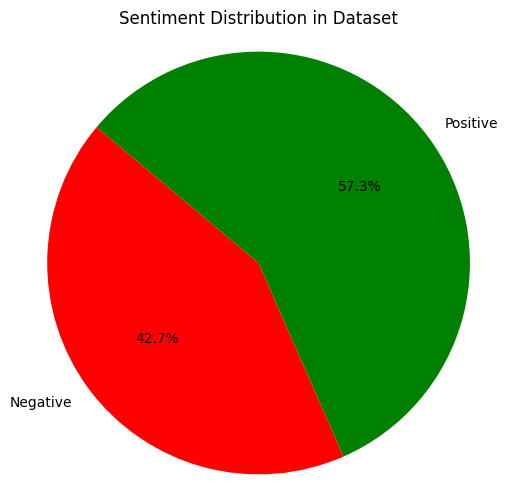

In [ ]:
# Pie chart for sentiment distribution
labels = ['Negative', 'Positive']
sizes = df['sentiment'].value_counts(normalize=True).sort_index() * 100

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['red', 'green'])
plt.axis('equal')
plt.title('Sentiment Distribution in Dataset')
plt.show()